In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Import and preprocess the dataset.

In [2]:
df = pd.read_csv(r"C:\Extras\Programs\My Projects\income simple linear regressio\datasets\happyscore_income.csv")
df

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
0,Armenia,37.0,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821,Armenia
1,Angola,26.0,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778,Angola
2,Argentina,60.0,7.1,1.91,7101.12,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351,Argentina
3,Austria,59.0,7.2,2.11,19457.04,16879.620000,30.296250,'Western Europe',7.200,1.33723,Austria
4,Australia,65.0,7.6,1.80,19917.00,15846.060000,35.285000,'Australia and New Zealand',7.284,1.33358,Australia
...,...,...,...,...,...,...,...,...,...,...,...
106,Uruguay,58.0,7.0,2.13,7544.40,5269.226667,45.014444,'Latin America and Caribbean',6.485,1.06166,Uruguay
107,Vietnam,53.0,6.1,1.77,2231.40,1643.580000,39.242500,'Southeastern Asia',5.360,0.63216,Vietnam
108,South Africa,49.0,6.3,2.47,3889.32,1506.400000,63.726667,'Sub-Saharan Africa',4.642,0.92049,South Africa
109,Zambia,37.0,5.0,2.61,956.76,510.060000,55.120000,'Sub-Saharan Africa',5.129,0.47038,Zambia


In [3]:
df = df[['avg_income', 'happyScore']].dropna()
x = df[['avg_income']]
y = df['happyScore']
x,y

(     avg_income
 0       2096.76
 1       1448.88
 2       7101.12
 3      19457.04
 4      19917.00
 ..          ...
 106     7544.40
 107     2231.40
 108     3889.32
 109      956.76
 110     1768.56
 
 [111 rows x 1 columns],
 0      4.350
 1      4.033
 2      6.574
 3      7.200
 4      7.284
        ...  
 106    6.485
 107    5.360
 108    4.642
 109    5.129
 110    4.610
 Name: happyScore, Length: 111, dtype: float64)

## Split data into train-test sets.

In [4]:
x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, test_size=0.2, random_state=42)

x_tr, x_ts, y_tr, y_ts

(       avg_income
 26    1875.240000
 22    6901.466667
 31   13842.990000
 47    5215.040000
 76   18234.435000
 ..            ...
 106   7544.400000
 14    3484.680000
 92    7986.396923
 51    1492.680000
 102    941.400000
 
 [88 rows x 1 columns],
        avg_income
 78    1428.120000
 10     572.880000
 4    19917.000000
 84    9982.875000
 64    3077.280000
 68    1922.640000
 30    7906.725000
 45   10645.240000
 96    1177.680000
 11     989.040000
 79    6250.360000
 80    4312.666667
 0     2096.760000
 81    2224.464000
 18    7557.990000
 70    4148.000000
 56    1491.720000
 72     714.720000
 109    956.760000
 42    6903.883636
 12    3985.710000
 36   17099.550000
 65     574.200000,
 26     4.369
 22     7.226
 31     6.329
 47     4.686
 76     7.378
        ...  
 106    6.485
 14     4.332
 92     5.995
 51     4.419
 102    3.781
 Name: happyScore, Length: 88, dtype: float64,
 78     4.514
 10     2.905
 4      7.284
 84     5.102
 64     5.889
 68     4.436
 30 

## Fit a Linear Regression model

In [5]:
model = LinearRegression()
model.fit(x_tr, y_tr)

# Coefficients
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

Intercept: 4.507458808084176
Coefficient: 0.00013889578601260978


## Evaluate model using MAE, MSE, R².

In [8]:
y_pr = model.predict(x_ts)

mae = mean_absolute_error(y_ts, y_pr)
mse = mean_squared_error(y_ts, y_pr)
r2 = r2_score(y_ts, y_pr)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

MAE: 0.7490
MSE: 0.8571
R² Score: 0.4632


## Plot regression line and interpret coefficients.

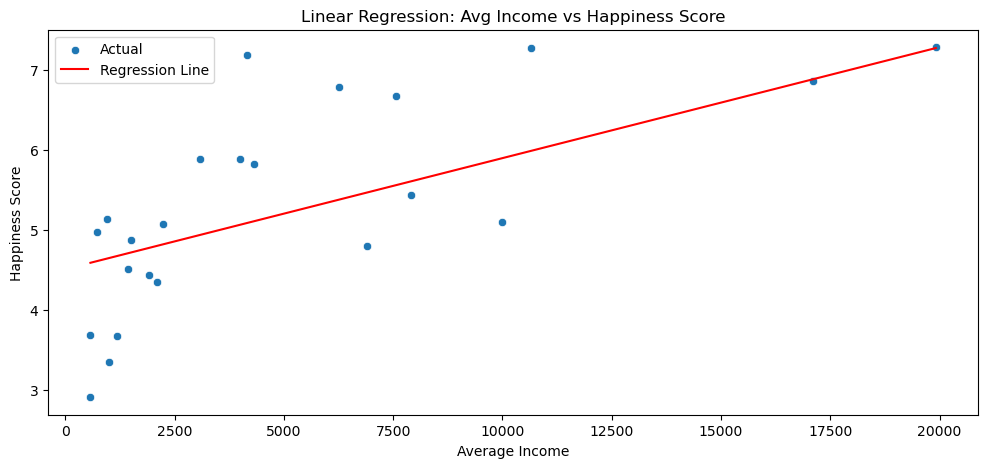

In [12]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=x_ts['avg_income'], y=y_ts, label='Actual')
sns.lineplot(x=x_ts['avg_income'], y=y_pr, color='red', label='Regression Line')
plt.xlabel("Average Income")
plt.ylabel("Happiness Score")
plt.title("Linear Regression: Avg Income vs Happiness Score")
plt.legend()
plt.show()